# Pytorch's Cartoon GAN

**Generative Adversarial Network for Generating `Cartoon` Faces**

## Reference
- [Dataset Link](https://www.kaggle.com/datasets/imreallyjohn/cartoonset10k)
- [Notebook Referred](https://jovian.com/aakashns/06b-anime-dcgan)

## ToDo
- [ ] Notebook Preparation
- [ ] Data Exploration
- [ ] Data Preparation
- [ ] Model Definition
- [ ] Model Traning
- [ ] HyperTuning (if needed)
- [ ] Evaluation

### Notebook Preparation

In [60]:
# Import Libraries

import os
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from torchvision.datasets import ImageFolder

from PIL import Image as img
from tqdm.notebook import tqdm
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Datafile Checking

DATA_DIR = '/kaggle/input/cartoonset10k/cartoonset10k/'

imagesDir = os.listdir(DATA_DIR)

print('Sample: ', imagesDir[:5])
print('Length: ', len(imagesDir))

Sample:  ['cs11221941617409717231.png', 'cs1140172971336216492.png', 'cs10497634233692504766.png', 'cs10947981428783986823.png', 'cs10249589535790648751.png']
Length:  10000


### Data Exploration

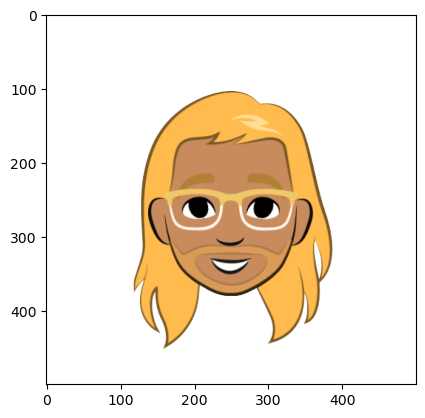

In [29]:
# Plotting Image

sampleImg = imagesDir[1]

image = mpimg.imread(DATA_DIR + sampleImg)
plt.imshow(image)
plt.show()

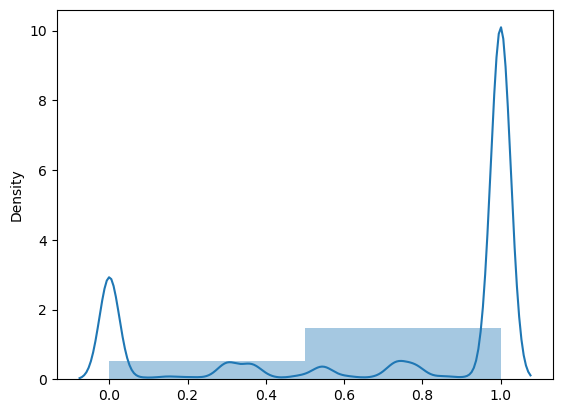

In [66]:
# Plotting Values Distribution

newImg = image.reshape(image.shape[2], (image.shape[0]*image.shape[1]))
sns.distplot(newImg, bins = 2)
plt.show()

### Data Preparation